# 3D Partially coherent ODT processing

This reconstruction is based on the 3D PODT paper ([here](https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-25-14-15699&id=368361)): <br>
```J. M. Soto, J. A. Rodrigo, and T. Alieva, "Label-free quantitative 3D tomographic imaging for partially coherent light microscopy," Opt. Express 25, 15699-15712 (2017).```<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fft2, ifft2, fftn, ifftn, fftshift, ifftshift

import pickle
import waveorder as wo

%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.style.use(['dark_background']) # Plotting option for dark background


### Load data

In [2]:
# Load simulations

file_name = '3D_PODT_simulation.npz'


array_loaded = np.load(file_name)
list_of_array_names = sorted(array_loaded)

for array_name in list_of_array_names:
    globals()[array_name] = array_loaded[array_name]

print(list_of_array_names)
N, M, L = I_meas.shape


['I_meas', 'NA_illu', 'NA_obj', 'Source_cont', 'lambda_illu', 'n_media', 'ps', 'psz']


### Refractive index reconstruction

In [3]:
z_defocus = (np.r_[:L]-L//2)*psz
chi = 0.1*2*np.pi

setup = wo.waveorder_microscopy((N,M), lambda_illu, ps, NA_obj, NA_illu, z_defocus, chi, \
                                n_media = n_media, phase_deconv='3D')


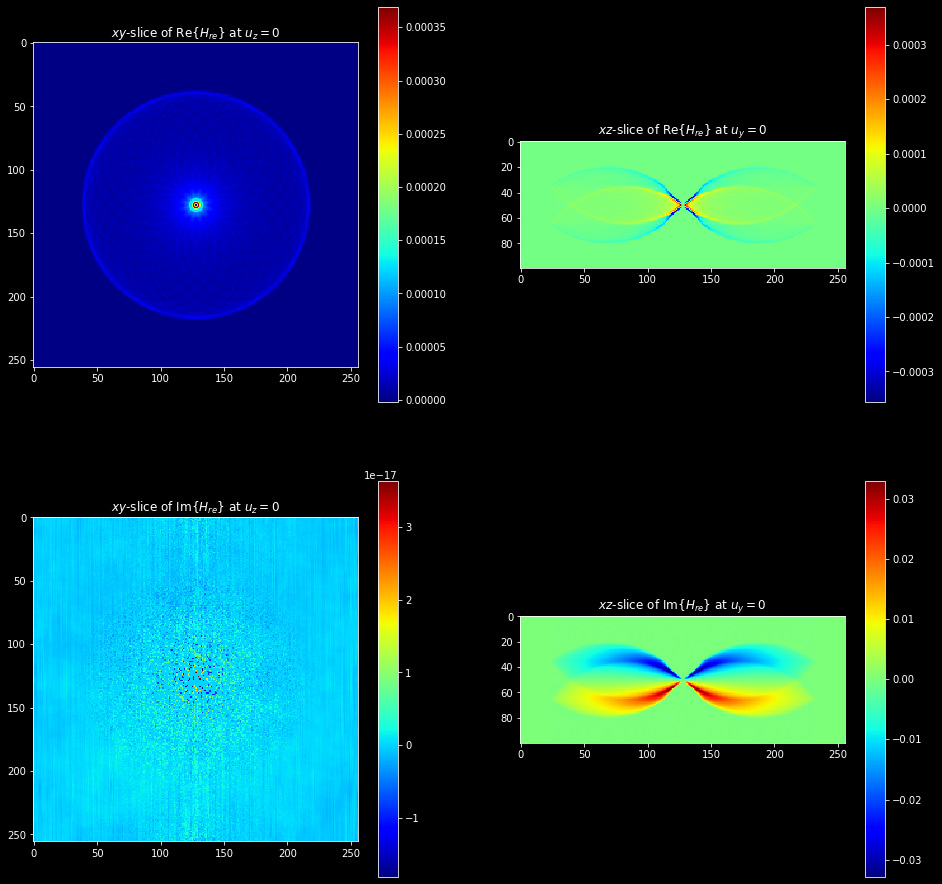

In [4]:
H_re_vis = fftshift(setup.H_re)

wo.plot_multicolumn([np.real(H_re_vis)[:,:,L//2], np.transpose(np.real(H_re_vis)[N//2,:,:]), \
                     np.imag(H_re_vis)[:,:,L//2], np.transpose(np.imag(H_re_vis)[N//2,:,:])], \
                    num_col=2, size=8, set_title=True, \
                    titles=['$xy$-slice of Re{$H_{re}$} at $u_z=0$', '$xz$-slice of Re{$H_{re}$} at $u_y=0$', \
                            '$xy$-slice of Im{$H_{re}$} at $u_z=0$', '$xz$-slice of Im{$H_{re}$} at $u_y=0$'], colormap='jet')

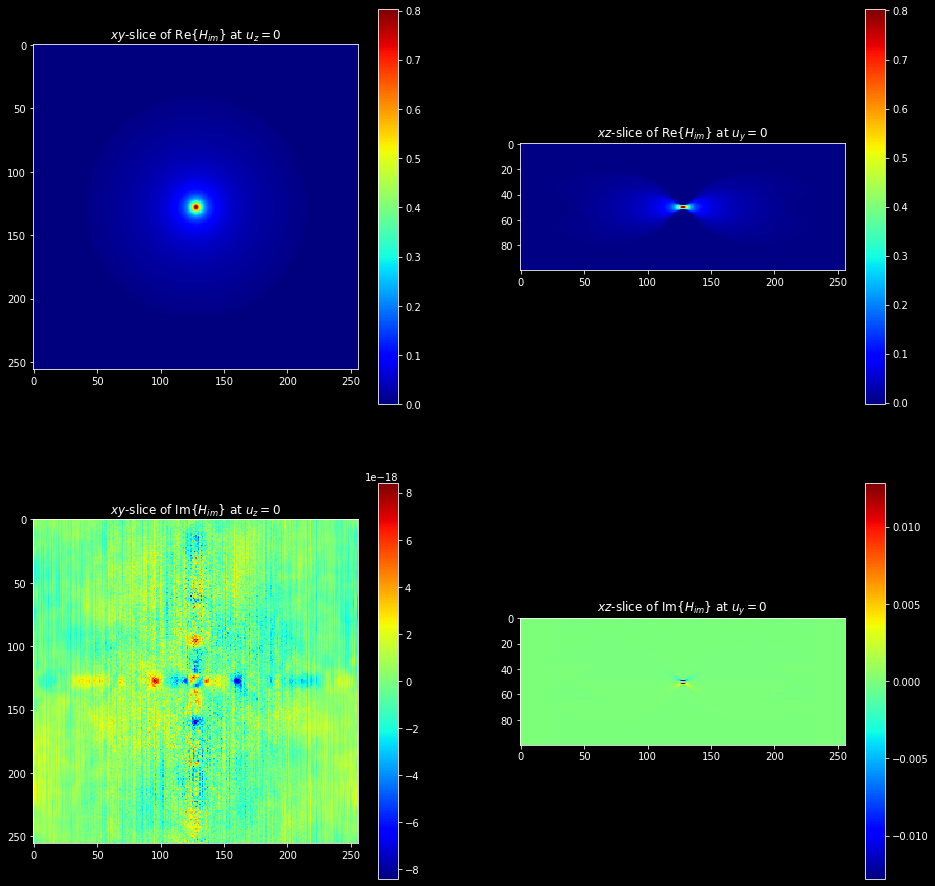

In [5]:
H_im_vis = fftshift(setup.H_im)

wo.plot_multicolumn([np.real(H_im_vis)[:,:,L//2], np.transpose(np.real(H_im_vis)[N//2,:,:]), \
                     np.imag(H_im_vis)[:,:,L//2], np.transpose(np.imag(H_im_vis)[N//2,:,:])], \
                    num_col=2, size=8, set_title=True, \
                    titles=['$xy$-slice of Re{$H_{im}$} at $u_z=0$', '$xz$-slice of Re{$H_{im}$} at $u_y=0$', \
                            '$xy$-slice of Im{$H_{im}$} at $u_z=0$', '$xz$-slice of Im{$H_{im}$} at $u_y=0$'], colormap='jet')

In [6]:
# xz section of the brightfield images
wo.image_stack_viewer(np.transpose(I_meas,(0,2,1)), origin='lower')

interactive(children=(IntSlider(value=0, description='stack_idx', max=255), Output()), _dom_classes=('widget-i…

<function waveorder.visual.image_stack_viewer.<locals>.interact_plot_3D(stack_idx)>

In [7]:
f_real = setup.Phase_recon_3D(I_meas, absorption_ratio=0.0, method='Tikhonov', reg_re = 1e-4)

In [8]:
# xz section of the phase images
wo.image_stack_viewer(np.transpose(f_real,(0,2,1)), origin='lower')

interactive(children=(IntSlider(value=0, description='stack_idx', max=255), Output()), _dom_classes=('widget-i…

<function waveorder.visual.image_stack_viewer.<locals>.interact_plot_3D(stack_idx)>

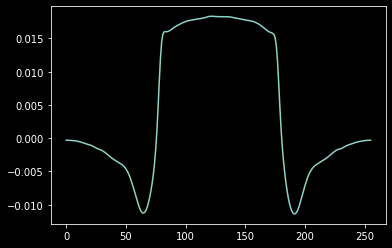

In [9]:
plt.plot(f_real[N//2,:,L//2])